In [1]:
from IPython.display import Image, display

# Q-Learning

## Revisão

* Estado de Markov

    * Toda informação necessária esta neste estado (O presente não depende do passado)

* Cadeia de Markov ou Processo de Markov

* Processo de Recompensa de Markov (MRP)

* Processo de Decisão de Markov (MDP)

* Equação de Bellman

    * Maximizar as recompensas

    * Encontrar $q_*$ -> MDP ótimo

* Equação ótima de Bellman é não linear

    * Programação dinâmica

    * Método Monte Carlo

    * Método de Diferença Temporal

## Abordagens

* Programação dinâmica

    * Aproximam $v_*$ assumindo que há conhecimento perfeito do modelo do ambiente

    * Aprendizado offline

* Método Monte Carlo

    * Não exigem modelo, mas não obtém melhorias a todo passo

    * Deve ser aplicado em tarefas episódicas

* Métodos de Diferença Temporal (TD)

    * Não exigem modelo e são totalmente incrementais

    * Q-learning: uma das mais importantes descobertas

## Q-learning

* Usa solução iterativa

    * Inicializa estimativas

    * Escolhe ação

    * Obtém retorno do ambiente

    * Melhora estimativas baseado na equação de Ballman

### Inicializa estimativas

* Cria tabela q (q-table)

* Inicializa-a com zeros

* Dado o estado, qual ação devo tomar ?

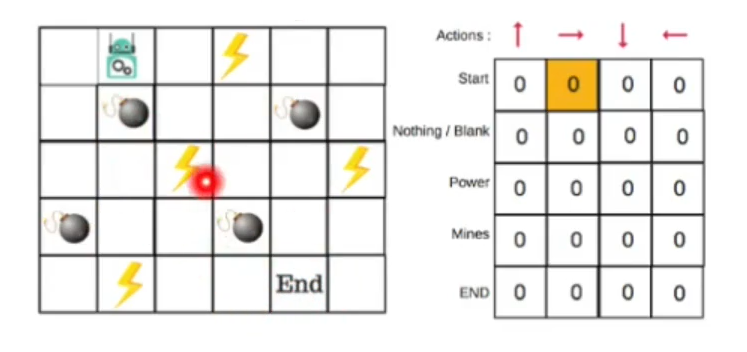

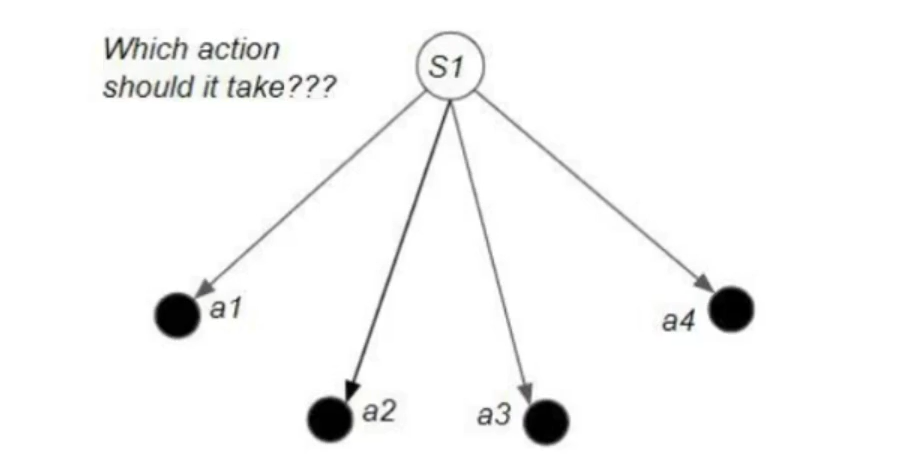

In [2]:
display(Image('Imagens/Imagem0001.png'), Image('Imagens/Imagem0002.png'))

### Escolhe ação - Off-policy

* Política de comportamento $\mu$ - **Explora**

    * A próxima ação é escolhida baseadando-se por ela.

* Politica alvo $\pi$ - **Aproveita**

    * Referente a ação de maior valor.

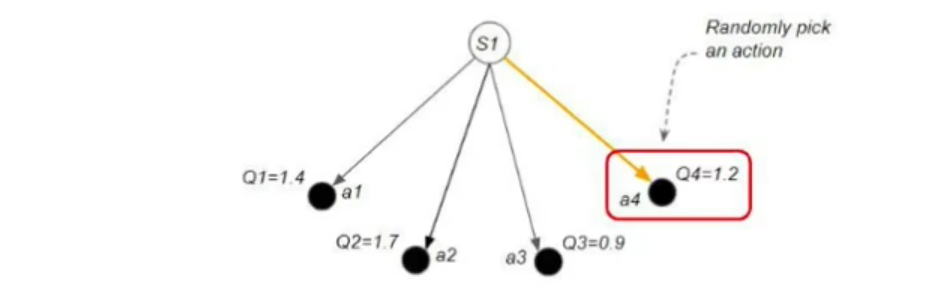

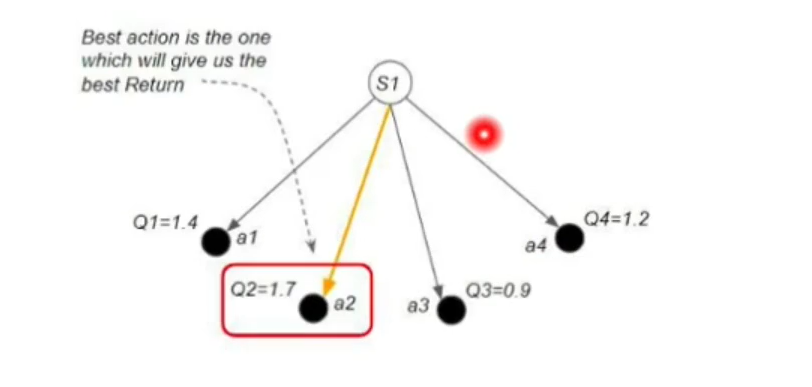

In [3]:
display(Image('Imagens/Imagem0003.png'), Image('Imagens/Imagem0004.png'))

### Exploração vs Aproveitamento

* $\epsilon$ - *guloso*

    * Taxa de exploração que ajusta o progresso de treinamento para garantir mais exploração no ínicio de treinamento e muda para maior aproveitamento nos epsódios finais.

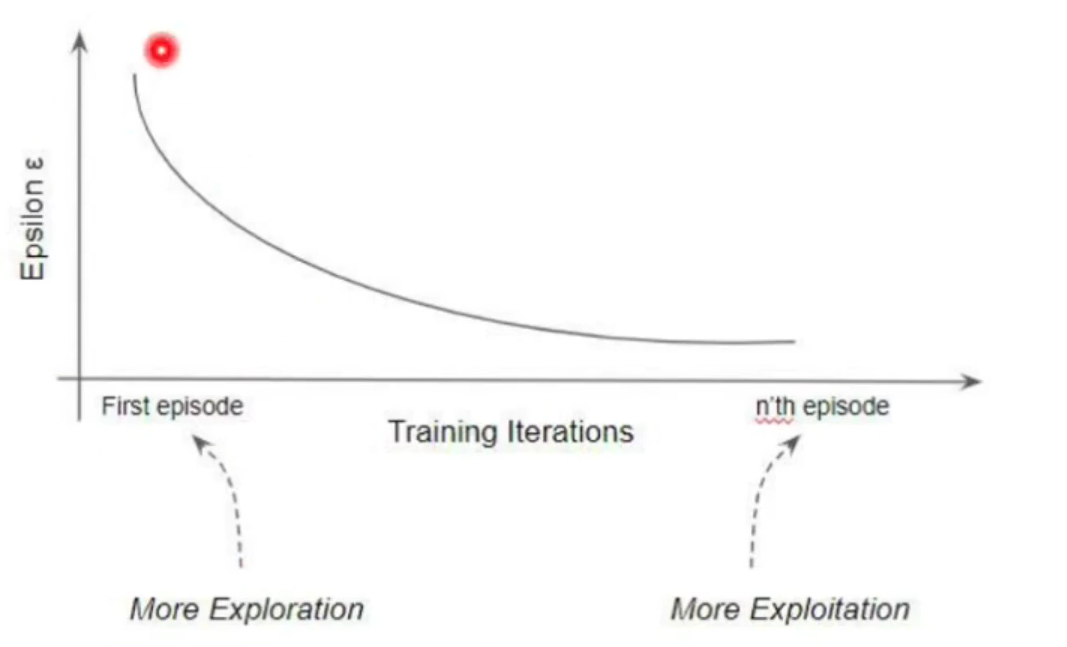

In [4]:
display(Image('Imagens/Imagem0005.png'))

### Obtem o retorno do ambiente

* Agente recebe feedback do ambiente

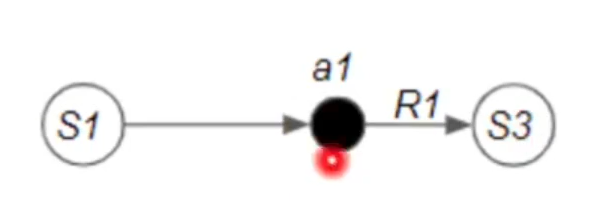

In [5]:
display(Image('Imagens/Imagem0006.png'))

Q-learning usa 2 diferentes ações na otimização

\# 1 açao atual - $\epsilon$ - *guloso* - exploração

\# 2 ação alvo - aproveitamento

$\alpha  = \gamma = 1$

|---|a1 | a2 | a3 | a4 |
|---|---|----|----|----|
|s1 |0  |  0 | 0  |  0 |
|s2 |0  |  0 | 0  |  0 |

s1 -> a1 -> s2 -> \*
               -> \*
               -> \*
               -> \*

Algumas iterações depois...

|---|a1 | a2 | a3 | a4 |
|---|---|----|----|----|
|s1 |1  |  9 | 2  |  3 |
|s2 |0  |  3 | 4  |  7 |


|---|a1 | a2 | a3 | a4 |
|---|---|----|----|----|
|s1 |9  |  9 | 2  |  3 |
|s2 |0  |  3 | 4  |  7 |

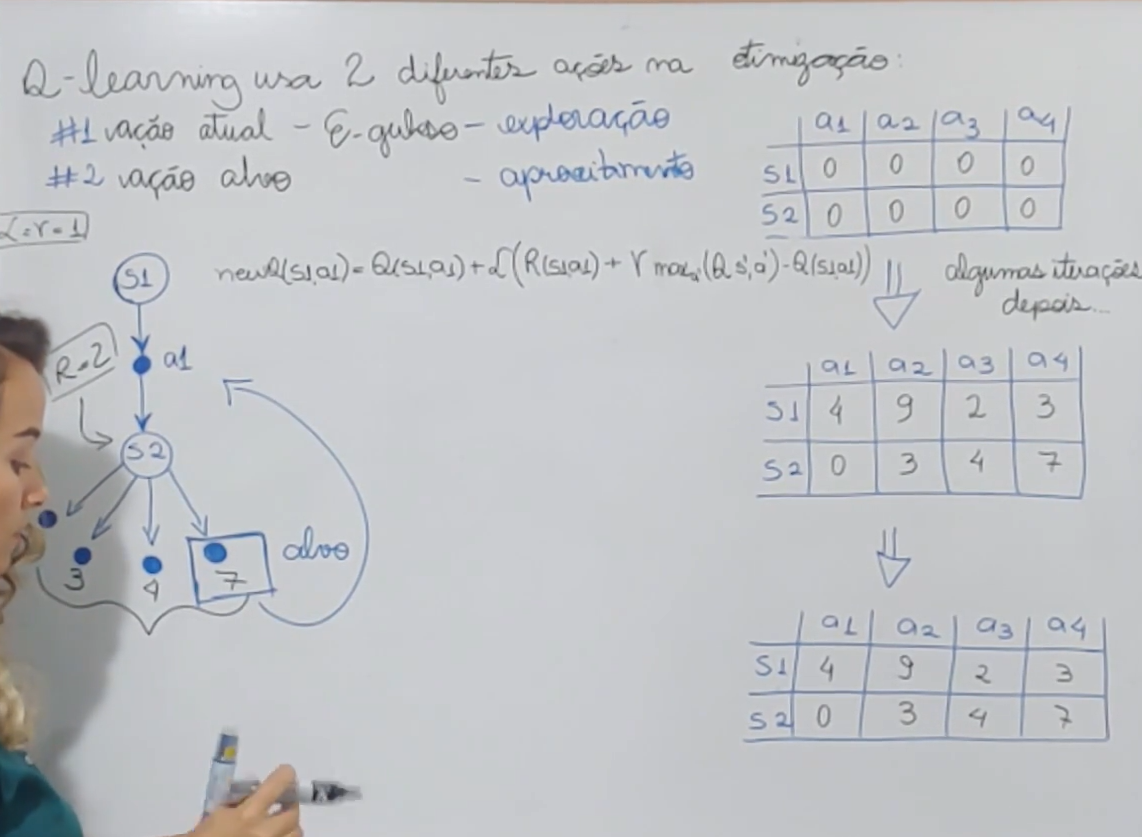

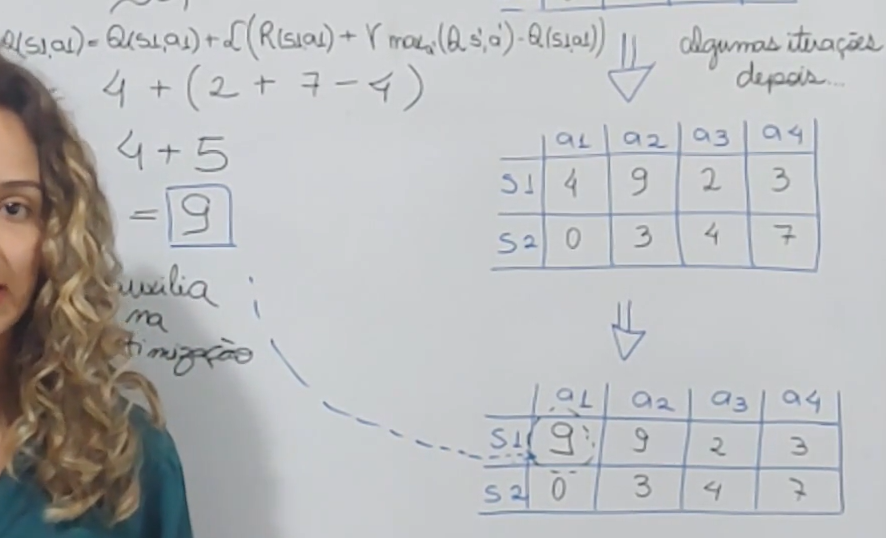

In [6]:
display(Image('Imagens/Imagem0007.png'), Image('Imagens/Imagem0008.png'))

https://gym.openai.com

In [7]:
!pip install cmake gym scipy

In [8]:
import gym

In [9]:
env = gym.make('Taxi-v3').env

In [10]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [11]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [12]:
env.action_space

Discrete(6)

In [13]:
# (5 x 5) * 4 * 5
# (5 x 5) tamanho da matriz
# 4 - lugares onde pegar o passageiro
# 5 - Lugares onde o passageiro pode estar
env.observation_space

Discrete(500)

In [14]:
# definindo os valores para ponto
state = env.encode(3,1,2,0)

In [15]:
env.s = state

In [16]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [17]:
# matriz de transição de estados
env.P[state]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [18]:
penalties = 0
epochs = 0
done = False
frames = []

while not done:
    action = env.action_space.sample() # seleciona uma ação randomica
    state, reward, done, info = env.step(action) # executa a ação

    if reward == -10:
        penalties += 1

    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
    })

    epochs += 1

print(f'Número de épocas: {epochs}')
print(f'Número de penalidades: {penalties}')

Número de épocas: 3508
Número de penalidades: 1151


In [19]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames: []):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f'Timestep: {i + 1}')
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(0.1)

In [20]:
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 3508
State: 0
Action: 5
Reward: 20


## Usar q-learning para treinamento do agente

In [21]:
import numpy as np
import random

In [22]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

* Passo 2 - Escoher uma ação atual

* Passo 3 - Toma a ação (a) e observa o estado de saida (s') e a recompensa (r)

* Passo 4 - Atualização Q(s,a) := Q(s,a) + lr [R(s,a)] + gamma * max Q(s,a)

In [23]:
total_episodios = 100001

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

values = []

for episode in range(total_episodios):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    values.append(epsilon)

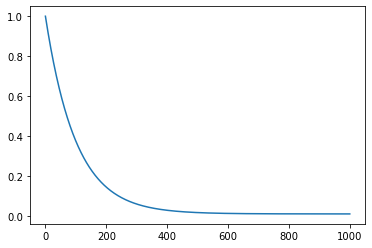

In [24]:
import matplotlib.pyplot as plt

lista = [f for f in range(1000)]

plt.plot(lista, values[0:1000])

In [26]:
total_epsodes = 100001
max_steps = 99
epsilon = 1.0
lr = 0.7
gamma = 0.618

for episode in range(total_episodios):
    state = env.reset()
    step = 0

    for step in range(max_steps):
        tradeoff = random.uniform(0, 1)

        ## aproveitamento
        if tradeoff > epsilon:
            action = np.argmax(q_table[state,:])
        ## exploração
        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)

        q_table[state, action] = q_table[state,action] + lr * (reward + gamma * np.argmax(q_table[new_state, :]) - q_table[state,action])

        state = new_state

        if done == True:
            break

        if episode % 100 == 0:
            clear_output(wait=True)
            print(f'Episode: {episode}')

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)

Episode: 100000


In [27]:
q_table

array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [-0.382   ,  0.854   ,  0.854   ,  0.854   ,  0.854   , -8.146   ],
       [-0.973   ,  0.08498 ,  0.236   ,  0.      ,  0.15176 , -8.527372],
       ...,
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.3878  , -0.7     , -0.34762 , -0.91    ,  0.      , -7.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ]])

In [28]:
env.reset()
rewards = []
frames = []

penalties = 0
total_test_epsode = 10000

for episode in range(total_test_epsode):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        action = np.argmax(q_table[state, :])

        new_state, reward, done, info = env.step(action)

        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
        })

        total_rewards += reward

        if reward == -10:
            penalties += 1

        if done:
            rewards.append(total_rewards)
            break

        state = new_state 

env.close()

print(f'Score final: {str(sum(rewards)/total_test_epsode)}')

Score final: 0.0


In [ ]:
print_frames(frames)